# SLM Cleanroom — Walkthrough + Viz (Dry-Run)
This notebook demonstrates use of LLM or SML to correct product descriptions on product management CRM purposes. Cleaning or just standardizing the output. A stylebook defines the style of product descriptions.

In [1]:
from pathlib import Path
import pandas as pd
ROOT = Path('/content/slm-cleanroom') if Path('/content/slm-cleanroom').exists() else Path('.')
ROOT

PosixPath('/content/slm-cleanroom')

## Stylebook (if present)

In [8]:
sb = ROOT/'data'/'stylebook.fi.yaml'
print(sb if sb.exists() else 'Stylebook not found (data/stylebook.fi.yaml)')
if sb.exists():
    print('-'*60)
    print(sb.read_text(encoding='utf-8', errors='ignore'))

/content/slm-cleanroom/data/stylebook.fi.yaml
------------------------------------------------------------
tone: "selkeä, asiallinen, luottamusta herättävä"
audience: "kuluttaja"
casing: "Lause alkaa isolla kirjaimella; tuotemallit kirjoitetaan kuten valmistaja."
forbidden:
  - "halpa"
  - "super-"
  - "!!!"
  - "100% paras"
prefer:
  - "edullinen"
  - "laadukas"
  - "hyvin viimeistelty"
  - "kestävä"
units: "SI-yksiköt; välilyönti numeron ja yksikön väliin (esim. 10 kg, 15 cm)."
rules:
  - "Kuvaile ominaisuudet konkreettisesti, ilman liioittelua."
  - "Pysy ytimekkäänä (1–2 virkettä)."
  - "Säilytä <TERM>...</TERM>-osuudet muuttumattomina."
  - "Pidä koko lopputeksti suomeksi, ellei <TERM>-sisältö pakota muuten."

categories:
  consoles:
    prefer: ["4K HDR", "hiljainen jäähdytys", "nopea lataus", "1 TB tallennustila"]
    forbidden: ["ultimate gaming beast", "pro-gamer only"]
    rules:
      - "Nosta esiin suorituskyky, kuva- ja ääniformaatit, tallennustila."
    examples:
      - 

## Sample input (CSV/Excel)

In [9]:
csv = ROOT/'data'/'product_samples.csv'
xlsx = ROOT/'data'/'product_samples.xlsx'
if csv.exists():
    df_in = pd.read_csv(csv)
elif xlsx.exists():
    df_in = pd.read_excel(xlsx, sheet_name='inputs')
else:
    df_in = pd.DataFrame([{'id':1,'text':'Example product description.'}])
df_in.head(10)

,id,category,text,protected_terms,translate_embedded
0,1,shoes,TAkki on super warm for winter commutes kaupun...,NaN,True
1,2,screws,"Ruuvit 4x35 mm, pakkaus 100 kpl. Phillips head...",NaN,False
2,3,computers,"Läppäri: 15.6"" FHD, 16GB RAM, 512GB SSD, batte...",NaN,False
3,4,phones,Puhelin tukee fast charging ja wireless chargi...,NaN,True
4,5,games,Kuvaus: seikkailupeli with open world ja co-op...,NaN,True
5,6,consoles,"Konsoli: 1 TB storage, 4K HDR output; hiljaine...",NaN,False
6,7,minifigures,Keräily minifiguuri <TERM>Series 24 #102</TERM...,Series 24 #102,False
7,8,tgc,"TCG booster sisältää 10 korttia, holo rare mah...",NaN,False
8,9,mugs,"Muki 350ml, dishwasher safe, made of ceramic –...",NaN,True
9,10,accessories,"Nahkavyö, pituus 90–110 cm, solki steel look, ...",NaN,False


## Example output (if present)
Displays a cleaned CSV/XLSX (no processing performed here).

In [10]:
out_csv = ROOT/'data'/'product_samples_clean.csv'
out_xlsx = ROOT/'data'/'product_samples.processed.xlsx'
if out_csv.exists():
    df_out = pd.read_csv(out_csv)
elif out_xlsx.exists():
    df_out = pd.read_excel(out_xlsx, sheet_name='outputs')
else:
    df_out = df_in.copy()
    df_out['clean_text'] = df_out.get('text','')
df_out.head(10)[['id','text'] + ([c for c in df_out.columns if c=='clean_text'])]

,id,text,clean_text
0,1,TAkki on super warm for winter commutes kaupun...,Lämmin ja hengittävä kenkä kaupunkikäyttöön. P...
1,2,"Ruuvit 4x35 mm, pakkaus 100 kpl. Phillips head...","Ruuvi 4 x 35 mm, 100 kpl. Ristikanta (Phillips..."
2,3,"Läppäri: 15.6"" FHD, 16GB RAM, 512GB SSD, batte...","Läppäri: 15.6"" FHD, 16GB RAM, 512GB SSD, batte..."
3,4,Puhelin tukee fast charging ja wireless chargi...,Puhelin tukee pikalatausta ja langatonta latau...
4,5,Kuvaus: seikkailupeli with open world ja co-op...,"Seikkailupeli avoimessa maailmassa, yhteistyöt..."
5,6,"Konsoli: 1 TB storage, 4K HDR output; hiljaine...",1 TB tallennustila ja 4K HDR -tuki. Hiljainen ...
6,7,Keräily minifiguuri <TERM>Series 24 #102</TERM...,Keräilyminifiguuri <TERM>Series 24 #102</TERM>...
7,8,"TCG booster sisältää 10 korttia, holo rare mah...",Puskuripakka (booster) sisältää 10 korttia. Te...
8,9,"Muki 350ml, dishwasher safe, made of ceramic –...",350 ml keraaminen muki. Kestää astianpesukonee...
9,10,"Nahkavyö, pituus 90–110 cm, solki steel look, ...","Nahkavyö, pituus 90–110 cm. Teräksen sävyinen ..."


## Progress visualization (precomputed)
If metrics exist (created offline via tools/iterative_clean), they are shown below.

,iter,token_changes,en_tokens_prev,en_tokens_curr,en_delta
0,1,110,51,26,25
1,2,2,26,26,0


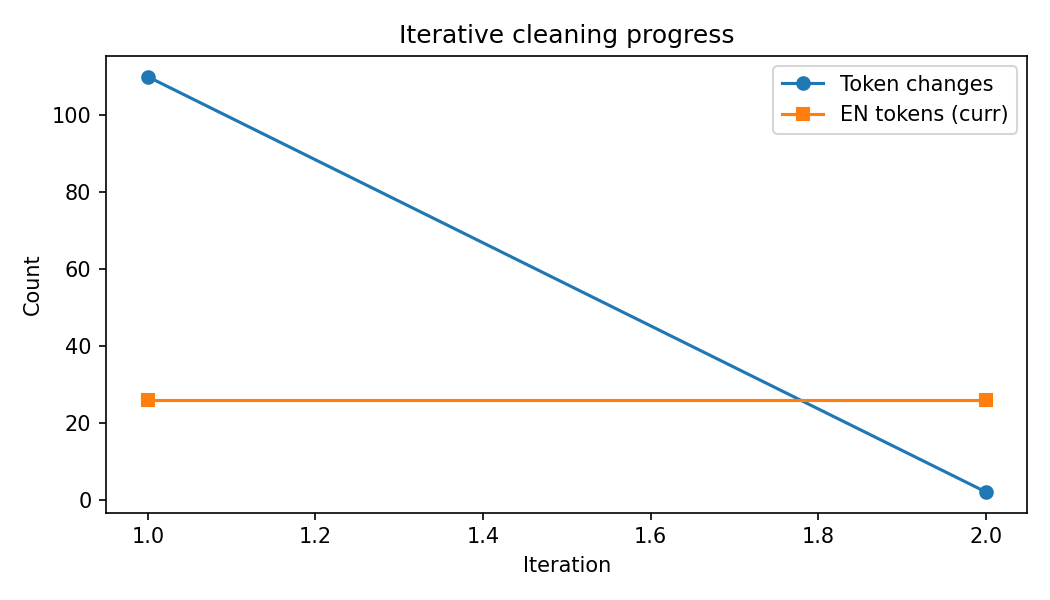

In [11]:
from IPython.display import Image, display
m_csv = ROOT/'data'/'iterative_metrics.csv'
m_png = ROOT/'data'/'iterative_metrics.png'
if m_csv.exists():
    display(pd.read_csv(m_csv))
else:
    print('No metrics CSV found (data/iterative_metrics.csv).')
if m_png.exists():
    display(Image(filename=str(m_png)))
else:
    print('No plot found (data/iterative_metrics.png). Generate offline with tools/iterative_clean.')